# Imports

In [1]:
#imports go here

import numpy as np
import random
import math
import time
%matplotlib inline
import matplotlib.pyplot as plt
import copy

#Initial System of Environments Function

In [2]:
# this creates a system of environments with individuals randomly distributed throughtout the system
# M = number of environments
# N = number of individuals
# PPR = prey/predator ratio

def Initial_System(M, N, PPR):
    
    N = float(N)
    PPR = float(PPR)
     
    # empty array, each row is an environment, left column is prey, right column is predators
    environ = np.zeros((M, 2))
    
    # uses PPR to determine numbers of prey/predators
    population_prey = round((N / (PPR + 1)) * (PPR))
    population_predator = N - population_prey
    
    # tests to see if true PPR is close to PPR entered in argument
    True_PPR = population_prey / population_predator
    
    population_prey = int(population_prey)
    population_predator = int(population_predator)
    
    population_prey_left = population_prey
    population_predator_left = population_predator
    
    # randomly assigns an environment to each individual
    for i in range(1, population_prey_left + 1):
        a = random.randint(0, M - 1)
        environ[a][0] += 1.0
        population_prey_left -= 1.0
    for j in range(1, population_predator_left + 1):
        b = random.randint(0, M - 1)
        environ[b][1] += 1.0
        population_predator_left -= 1.0
    
    # returns initial system of environments, plus to true PPR for assert testing
    return environ, True_PPR

In [3]:
# assert tests check to make sure true PPR is close to PPR entered in argument

assert abs(Initial_System(10, 100, 5)[1] - 5) <= 1
assert abs(Initial_System(10, 10000, 5)[1] - 5) <= 1
assert abs(Initial_System(10, 100, 10)[1] - 10) <= 1

#Utility Function

In [4]:
# this calculates the total utility of the system
# takes initial system of environments, M, and N as arguments
# A + B + C = total amount of utility possible
# the values of A, B, and C relative to each other determine how much utility can be gained from each aspect of an environment

def Utility(initial_system, M, N, A, B, C):
    
    # empty array, each row corresponds to the utility of that environment
    utility = np.zeros((M, 1))
    utility_list = []
    
    # array to store population of each environment
    population = np.zeros((M, 1))
    
    # array to store PPR of each environment
    PPR_eff = np.zeros((M, 1))
    
    # keeps track of total utility of a system
    total_utility = 0.0
    
    M_new = float(M)
    N = float(N)
    
    # iterates through each environment and calculates utility
    for j in range(0, M):
        population[j] = initial_system[j][0] + initial_system[j][1]
        if initial_system[j][1] == 0:
            PPR_eff[j] = 10000
        else:
            PPR_eff[j] = initial_system[j][0] / initial_system[j][1]
        U_1 = (A - A * (population[j] / N))
        U_2 = (B * (2.0 * np.arctan(PPR_eff[j] / 5) / np.pi))
        U_3 = (C - C * ((float(j) + 1) / M_new))
        utility[j] = U_1 + U_2 + U_3
        total_utility += utility[j][0] * population[j][0]
        utility_list.append(utility[j][0])
        
    # determines average utility per individual in the system
    avg_utility = total_utility / N
    
    # returns utility array, total utility, average utility, and a list form of the utility array
    return utility, total_utility, avg_utility, utility_list

#Rearrange Function

In [5]:
# rearranges the initial system until utility is maximized
# takes some system of environments, M, N, A, B, C as arguments

def Rearrange(some_system_i, M, N, A, B, C):
    
    # stores value of the change in utility
    # if Delta_U is negative, utility has been maximized
    Delta_U = 0
    
    # stores number of movements
    Movements = 0
    
    Delta_U_list = []
    
    Total_U_list = []
    
    stop = False
    
    # uses a while loop
    while stop != True:
        
        # finds the index of environment with most utility
        some_utility_list_i = Utility(some_system_i, M, N, A, B, C)[3]
        some_utility_arr_i = np.array(some_utility_list_i)
        index_max = np.where(some_utility_arr_i == some_utility_arr_i.max())[0][0]
        Found_Min = False
        End = False
        
        # this while loop finds index of environment with least utility
        while Found_Min != True:
            item = min(some_utility_list_i)
            index_min = np.where(some_utility_arr_i == item)[0][0]
            if len(some_utility_list_i) == 1:
                End = True
                break
            elif some_system_i[index_min][0] == 0.0 and some_system_i[index_min][1] == 0.0:
                some_utility_list_i.remove(item)
            else:
                Found_Min = True
        
        # calculates initial utility
        Total_Utility_i = round(Utility(some_system_i, M, N, A, B, C)[1], 2)
        rand_num = random.randint(0, 1)
        rand_num_opp = abs(rand_num - 1)
        
        if End == True:
            break
        
        # takes an individual from least satisfied environment, puts them in most satisfied environment
        # randomly chooses to take a prey or predator
        elif some_system_i[index_min][rand_num] > 0:
            some_system_i[index_min][rand_num] -= 1.0
            some_system_i[index_max][rand_num] += 1.0
        else:
            some_system_i[index_min][rand_num_opp] -= 1.0
            some_system_i[index_max][rand_num_opp] += 1.0
        
        Movements += 1
        
        # calculates final utility
        Total_Utility_f = round(Utility(some_system_i, M, N, A, B, C)[1], 2)
        
        # calculates change in utility
        Delta_U = Total_Utility_f - Total_Utility_i
        
        Delta_U_list.append(Delta_U)
        
        Total_U_list.append(Total_Utility_f)
        
        # when Delta_U is negative, the loop breaks
        if Delta_U < 0:
            break
    
    some_system_f = np.array(some_system_i, dtype = 'int')
    
    # returns the system in it's final form
    return some_system_f, Movements

#Find Equilibrium Function

In [6]:
# this function just brings together all the previous functions for convenience

def Find_Equilibrium(system_i, M, N, A, B, C):
    Data = Rearrange(system_i, M, N, A, B, C)
    system_f = Data[0]
    N_Movements = Data[1]
    return system_f, N_Movements

#Demonstration/Visualization

Number of Movements = 7924


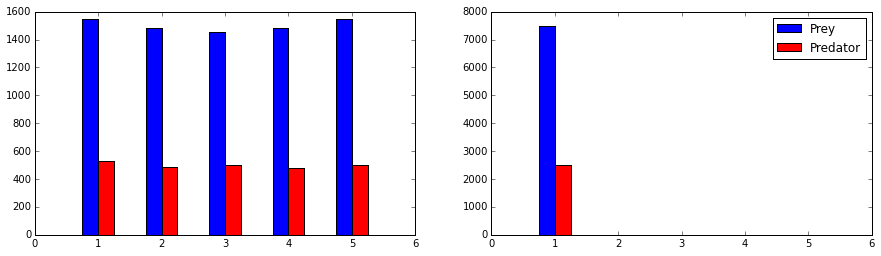

In [7]:
# NOTE: due to an unresolved bug, setting the value of A to be much higher than the values of B and C combined raises errors!!!

M = 5       # Enter the number of environment
N = 10000    # Enter the number of individuals
PPR = 3     # Enter the prey/predator ratio
A = 0.0     # A + B + C = 10.0
B = 0.0
C = 10.0

Test_System_i = Initial_System(M, N, PPR)[0]
Test_System_i_clone = copy.deepcopy(Test_System_i)

Data_Set = Find_Equilibrium(Test_System_i, M, N, A, B, C)
Test_System_f = Data_Set[0]
Number_of_Movements = Data_Set[1]

Prey_i = Test_System_i_clone[:, 0]
Predator_i = Test_System_i_clone[:, 1]

Prey_f = Test_System_f[:, 0]
Predator_f = Test_System_f[:, 1]

width = 0.25

x_prey = np.linspace(1, M, M)
x_predator = np.linspace(1, M, M)
for i in range(0, M):
    x_prey[i] -= width

plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
plt.bar(x_prey, Prey_i, width, color = 'blue', label = 'Prey')
plt.bar(x_predator, Predator_i, width, color = 'red', label = 'Predator')

plt.subplot(1, 2, 2)
plt.bar(x_prey, Prey_f, width, color = 'blue', label = 'Prey')
plt.bar(x_predator, Predator_f, width, color = 'red', label = 'Predator')
plt.legend()

print ("Number of Movements = %s") % (Number_of_Movements)